In [33]:
import pandas
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from scipy import stats
import math
import numpy

def calcularTau(n):
    tStudent = abs(stats.t.ppf(0.05/2,n-2))
    tau = tStudent*(n-1)/(math.sqrt(n)*math.sqrt(n-2+tStudent**2))
    return tau

def calcularDesvios(mediciones):
    s = numpy.std(mediciones)
    x = numpy.mean(mediciones)
    return mediciones.map(lambda xi: (xi-x) /s)

In [40]:
datos = pandas.read_csv('datos/cambridge.csv')
datos = datos.drop(16)

In [42]:
datos = pandas.read_csv('datos/moscu.csv')

In [44]:
datos = pandas.read_csv('datos/sidney.csv')

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(datos['IP2'], datos['RTT(ms)'])
plt.xticks(datos['IP2'], datos['IP2'], rotation='vertical')
plt.xlabel('Dirección IP destino', fontproperties=matplotlib.font_manager.FontProperties(size='x-large', weight='semibold'))
plt.ylabel('RTT [ms]', fontproperties=matplotlib.font_manager.FontProperties(size='x-large', weight='bold'))
plt.show()

<Figure size 1008x504 with 0 Axes>

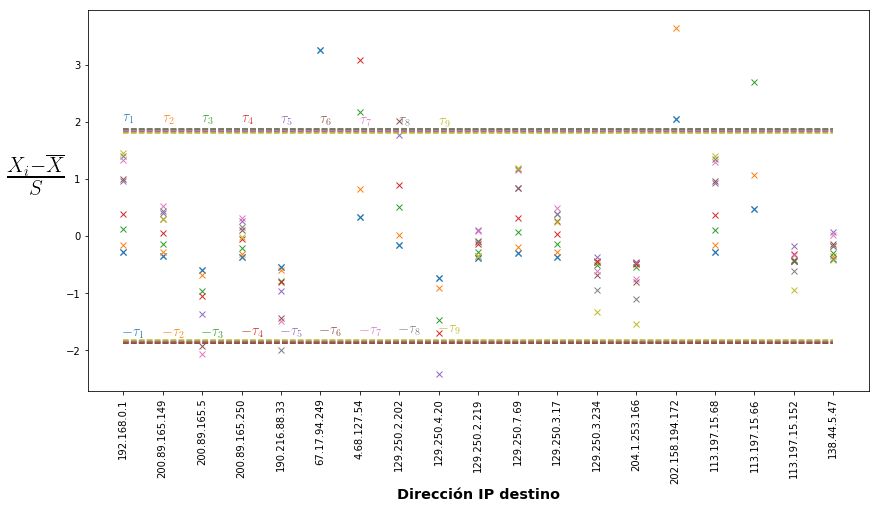

In [71]:
plt.figure(figsize=(14,7))

i = 0
outlier = True
desvios = datos['(x_i-media(x))/s']
mediciones = datos ['RTT(ms)']
ips = datos['IP2']
n = len(ips)
colores = ['C' + str(i) for i in range(n)]


plt.plot(ips, desvios, 'x',  color=colores[i % len(colores)])
plt.xticks(ips, ips, rotation='vertical')
plt.xlabel('Dirección IP destino', fontproperties=matplotlib.font_manager.FontProperties(size='x-large', weight='semibold'))
plt.ylabel('${X_{i}-\overline{X}}\over{S}$',rotation='horizontal', labelpad=30,usetex=True, fontproperties=matplotlib.font_manager.FontProperties(size='30', weight='bold'))

tau = calcularTau(len(desvios))


while(outlier):
    plt.plot(ips, desvios, 'x', color = colores[i % len(colores)])
    plt.plot([0, n-1], [tau, tau], '--', color = colores[i % len(colores)])
    plt.plot([0, n-1], [-tau, -tau], '--', color = colores[i % len(colores)])
    plt.annotate('$\\tau_' + str(i + 1) + '$', (i, tau + 0.1), usetex=True, color = colores[i % len(colores)], fontproperties=matplotlib.font_manager.FontProperties(size='x-large', weight='semibold'))
    plt.annotate('$-\\tau_' + str(i + 1) + '$', (i, -tau + 0.1), usetex=True, color = colores[i % len(colores)], fontproperties=matplotlib.font_manager.FontProperties(size='x-large', weight='semibold'))
    idxmax = pd.Series.idxmax(abs(desvios))
    outlier = len(desvios) < 2 or abs(desvios[idxmax]) > tau
    mediciones = mediciones.drop(idxmax)
    desvios = calcularDesvios(mediciones)
    ips = ips.drop(idxmax)

    tau = calcularTau(len(desvios))
    i = i + 1
    
plt.show()